# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import visualisations as vis

sns.set_theme(context='notebook', style='darkgrid', palette='tab10')

In [2]:
df = pd.read_csv('../data/clean_test_train.csv')
# set name column as index
df.set_index('name', inplace=True)
df.head()

,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,reviewed_by,from_vivino,age,log_price,log_rating_qty
name,,,,,,,,,,,,,,,
Starkconde Syrah 2017,Stellenbosch,South Africa,2017,Starkconde,red,Syrah,22.79,3.9,129,NaN,unknown,True,7,3.126322,4.859812
Montedidio Ostuni 2019,Puglia,Italy,2019,Montedidio,rose,Unknown,6.29,4.0,347,NaN,unknown,True,5,1.838961,5.849325
Alto Estate Cabernet Sauvignon 2014,Stellenbosch,South Africa,2014,Alto Estate,sparkling,Cabernet Sauvignon,19.26,4.1,157,NaN,unknown,True,10,2.958030,5.056246
Chateau Belgrave Hautmedoc Grand Cru Classe 2016,Hautmedoc,France,2016,Chateau Belgrave,white,Unknown,40.19,3.9,199,NaN,unknown,True,8,3.693618,5.293305
Tate Spring Street Cabernet Sauvignon 2019,Other,United States,2019,Tate Spring Street,red,Cabernet Sauvignon,80.99,4.7,24,14.3,0,False,5,4.394326,3.178054


In [3]:
print(df.shape)
df.describe()

(43328, 15)


,vintage,price,rating,rating_qty,abv,age,log_price,log_rating_qty
count,43328.000000,43328.000000,43328.000000,43328.000000,849.000000,43328.000000,43328.000000,43328.000000
mean,2015.429376,36.173033,3.861028,422.988091,13.779670,8.570624,3.060660,5.142730
std,3.226860,80.860756,0.307122,929.373772,1.117216,3.226860,0.855153,1.251193
min,1984.000000,2.800000,2.500000,21.000000,5.000000,3.000000,1.029619,3.044522
25%,2014.000000,11.507500,3.700000,62.000000,13.500000,7.000000,2.442999,4.127134
50%,2016.000000,18.930000,3.800000,150.000000,14.000000,8.000000,2.940748,5.010635
75%,2017.000000,31.460000,4.100000,396.000000,14.500000,10.000000,3.448717,5.981414
max,2021.000000,3700.660000,5.000000,24713.000000,16.000000,40.000000,8.216266,10.115085


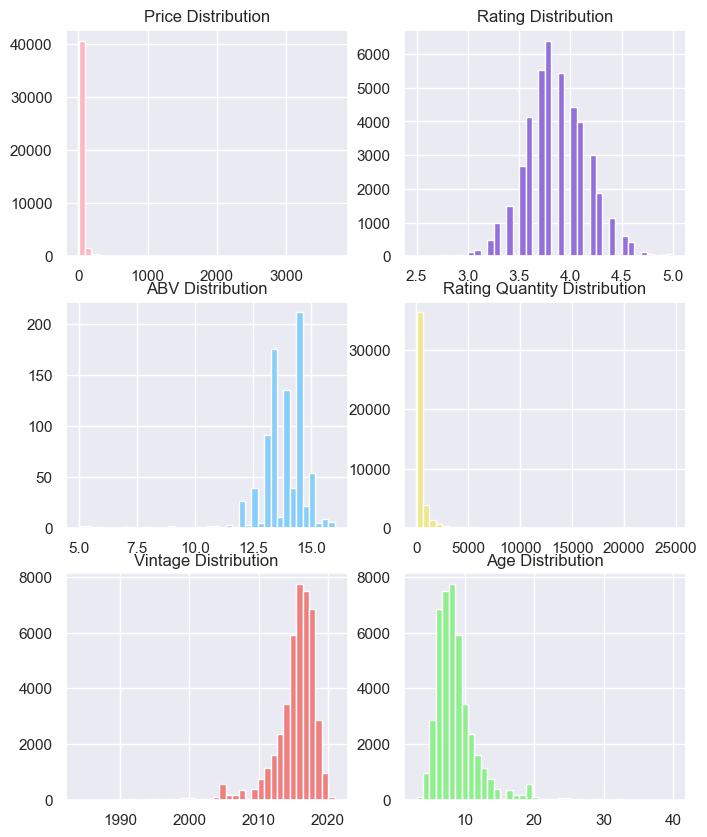

In [4]:

fig, axs = plt.subplots(3, 2, figsize=(8, 10))  
bins = 40
axs[0, 0].hist(df['price'], bins=bins, color='lightpink')
axs[0, 0].set_title('Price Distribution')
axs[0, 0].grid(True)

axs[0, 1].hist(df['rating'], bins=bins, color='mediumpurple')
axs[0, 1].set_title('Rating Distribution')
axs[0, 1].grid(True)

axs[1, 0].hist(df['abv'], bins=bins, color='lightskyblue')
axs[1, 0].set_title('ABV Distribution')
axs[1, 0].grid(True)

axs[1, 1].hist(df['rating_qty'], bins=bins, color='khaki')
axs[1, 1].set_title('Rating Quantity Distribution')
axs[1, 1].grid(True)

axs[2, 0].hist(df['vintage'], bins=bins, color='lightcoral')
axs[2, 0].set_title('Vintage Distribution')
axs[2, 0].grid(True)

axs[2, 1].hist(df['age'], bins=bins, color='lightgreen')
axs[2, 1].set_title('Age Distribution')
axs[2, 1].grid(True);

* Prices are heavily right skewed and would likely benefit from a logarithmic transformation before modelling.
* Rating qty also heavily right skewed and would likely benefit from a logarithmic transformation before modelling. Most wine have very few reviews, with some extreme outliers up to 24713. 
* ABV content fairly normally distibuted with clear spike at median of 13.5% 
* High number of observations with zero values in rating and rating_qty which is likely to affect the predictivness of any mode. A wine that has no reviews should not be considered to have a rating of zero. 

In [5]:
# Create measures for price per star
df['log_price_per_star'] = df['log_price'] / df['rating']
df['price_per_star'] = df['price'] / df['rating']

# Focusing only on wines below $100 which is often thought of as the maximum price of non-investment grade wine (consumer wines))
fine_wines = df[df['price'] > 100]
consumer_wines = df[df['price'] < 101]
print(f'Consumer wines: {consumer_wines.shape[0]}, fine wines: {fine_wines.shape[0]}')

Consumer wines: 40957, fine wines: 2388


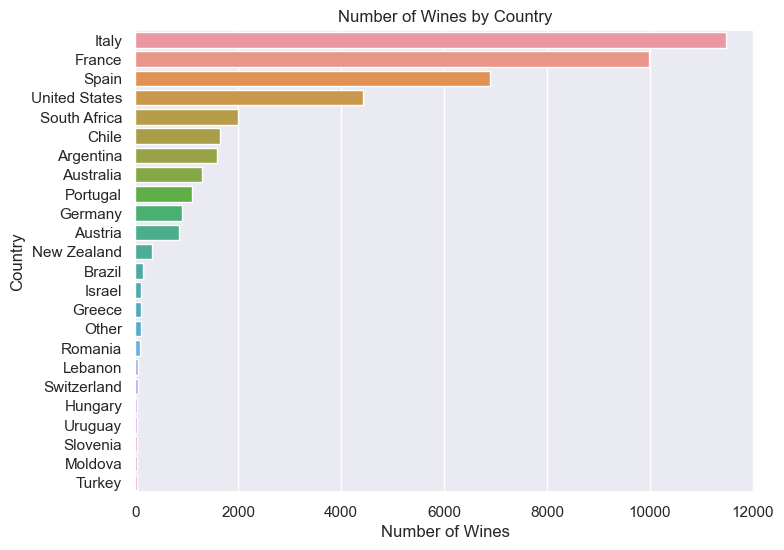

In [6]:
count_wines_by_country = df['country'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=count_wines_by_country.values, y=count_wines_by_country.index)
plt.xlabel('Number of Wines')
plt.ylabel('Country')
plt.title('Number of Wines by Country');

# Correlations

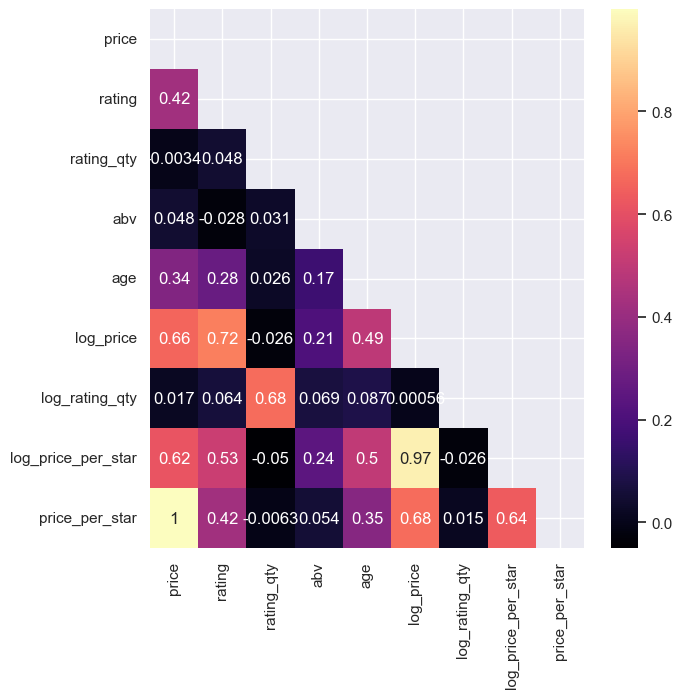

In [7]:
# Correlations on all numeric values 
numeric = df.drop(columns = [ 'region', 'country', 'vintage', 'producer', 'wine_variety',
       'grape_variety','reviewed_by','from_vivino'])

plt.figure(figsize=(7, 7))
mask = np.zeros_like(numeric.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(numeric.corr(), mask = mask, annot=True, cmap='magma');

* We can see that rating has a high correlation with price when a minimum number of ratings is set. In this case the minimum was 20. 
* Some positive correlation between log_price and alcohol content. 
* Rating and age have a positive correlation, which is to be expected, as wines age they are known to increase in depth of flavour. Furthermore more expensive wines are those created to age better and are often therefore left to age and more likely to be rated more highly once eventually drunk!
* All correlations are stronger with log_price than price suggesting again that our modelling might perform better with log_price as the target. 

In [8]:
consumer_wines.describe()

,vintage,price,rating,rating_qty,abv,age,log_price,log_rating_qty,log_price_per_star,price_per_star
count,40957.000000,40957.000000,40957.000000,40957.000000,781.000000,40957.000000,40957.000000,40957.000000,40957.000000,40957.000000
mean,2015.675196,23.853100,3.830876,423.718754,13.769462,8.324804,2.932235,5.140290,0.761186,6.048179
std,2.878638,18.654959,0.284305,938.877212,1.144500,2.878638,0.671539,1.251476,0.143162,4.376553
min,1984.000000,2.800000,2.500000,21.000000,5.000000,3.000000,1.029619,3.044522,0.292864,0.797222
25%,2015.000000,11.090000,3.700000,62.000000,13.500000,6.000000,2.406044,4.127134,0.654619,3.050000
50%,2016.000000,17.950000,3.800000,150.000000,14.000000,8.000000,2.887590,5.010635,0.754849,4.678378
75%,2018.000000,28.450000,4.000000,394.000000,14.500000,9.000000,3.348148,5.976351,0.857394,7.240000
max,2021.000000,100.850000,5.000000,24713.000000,16.000000,40.000000,4.613634,10.115085,1.254068,25.094872


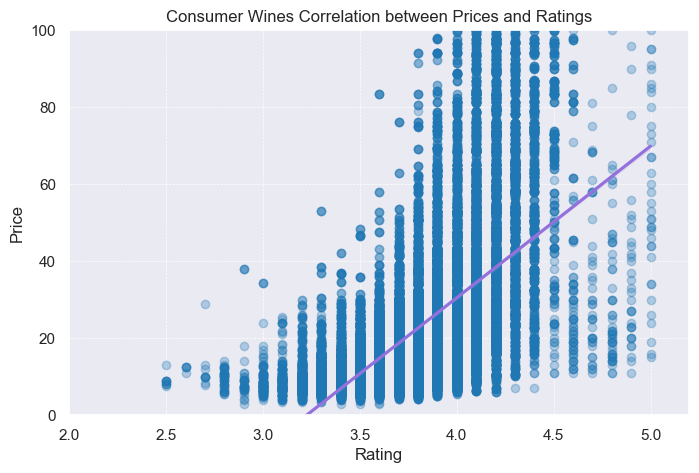

In [9]:
plt.figure(figsize=(8, 5))
sns.regplot(x='rating', y='price', data=consumer_wines, scatter_kws={'alpha':0.3}, line_kws={'color':'mediumpurple'})
plt.title('Consumer Wines Correlation between Prices and Ratings')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.xlim(2, 5.2)
plt.ylim(0, 100)
plt.grid(True, which="both", ls="--", linewidth=0.5);

Focusing in on wines below $100 and wines with a minimum number of 25 ratings: 
* We can see strong positive correlation between rating and price. 
* No wines with less than an average of 2 star rating. 
* bulk of wines rated around 4. 

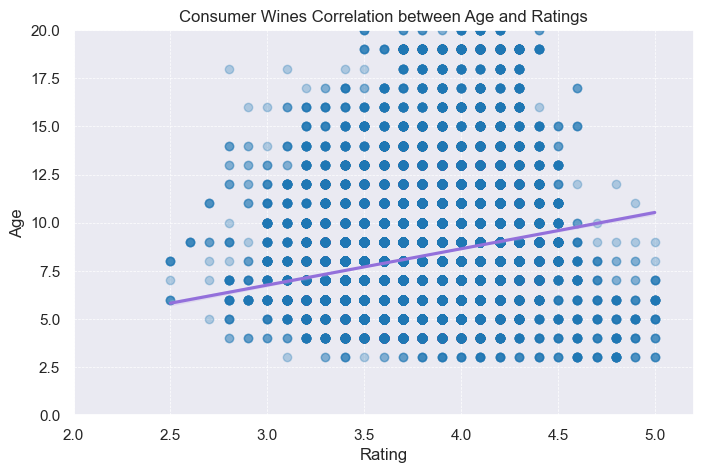

In [10]:
plt.figure(figsize=(8, 5))
sns.regplot(x='rating', y='age', data=consumer_wines, scatter_kws={'alpha':0.3}, line_kws={'color':'mediumpurple'})
plt.title('Consumer Wines Correlation between Age and Ratings')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.xlim(2, 5.2)
plt.ylim(0, 20)
plt.grid(True, which="both", ls="--", linewidth=0.5);

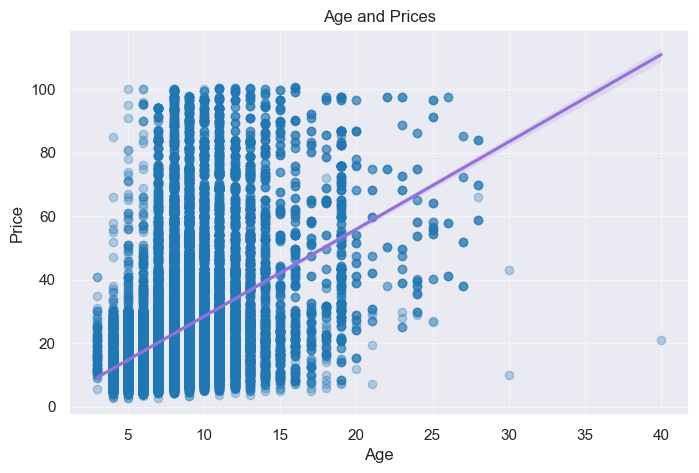

In [11]:
plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='price', data=consumer_wines, scatter_kws={'alpha':0.3}, line_kws={'color':'mediumpurple'})
plt.title('Age and Prices')
plt.xlabel('Age')
plt.ylabel('Price')
plt.grid(True, which="both", ls="--", linewidth=0.5);

# Price

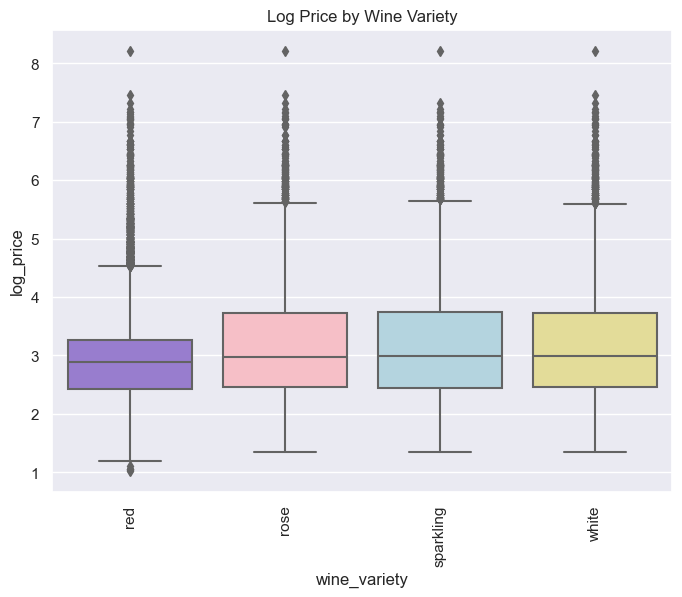

In [12]:
colour_mapping = {
    'red': 'mediumpurple',
    'rose': 'lightpink',
    'white': 'khaki',
    'sparkling': 'lightblue'
}

plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_variety', y='log_price', data=df, palette=colour_mapping)
plt.xticks(rotation=90)
plt.title('Log Price by Wine Variety');

### Producers and Price

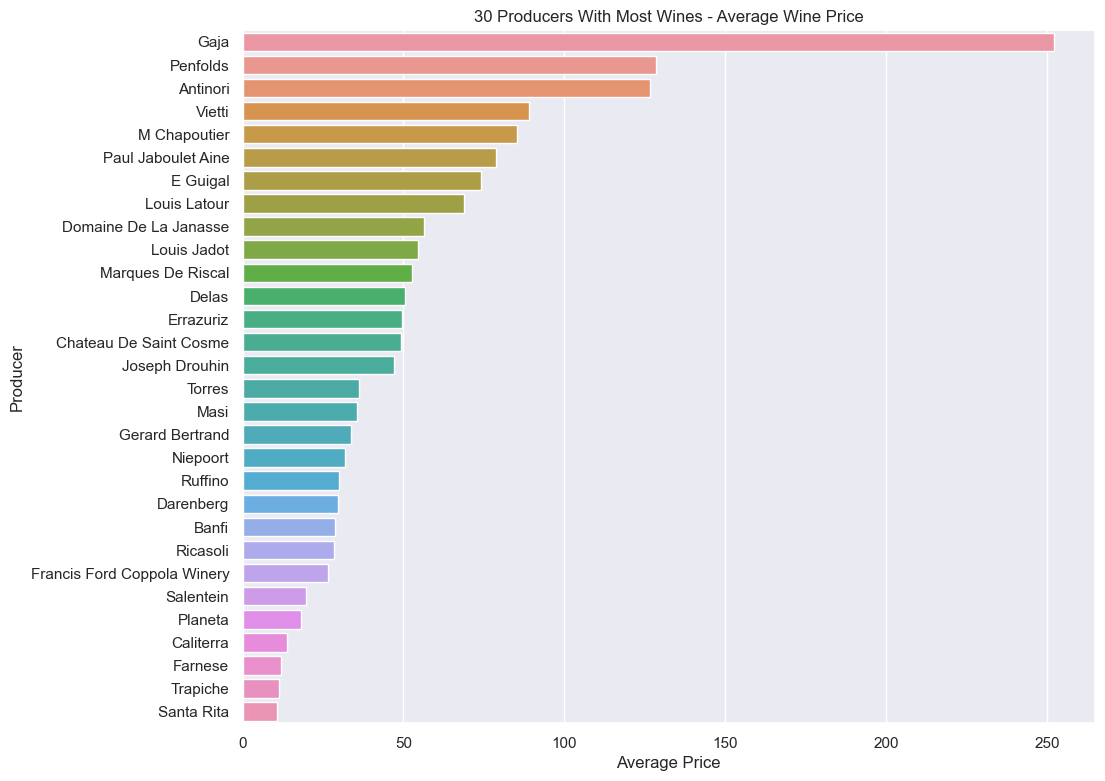

In [13]:
n_producers = 30
top_producers = df['producer'].value_counts().head(n_producers).index
filtered_df = df[df['producer'].isin(top_producers)]
average_prices = filtered_df.groupby('producer')['price'].mean().reset_index()
to_plot = average_prices.sort_values(by='price', ascending=False)

plt.figure(figsize=(11, 9))

sns.barplot(x='price', y='producer', data=to_plot)

plt.xlabel('Average Price')
plt.ylabel('Producer')
plt.title(f'{n_producers} Producers With Most Wines - Average Wine Price');


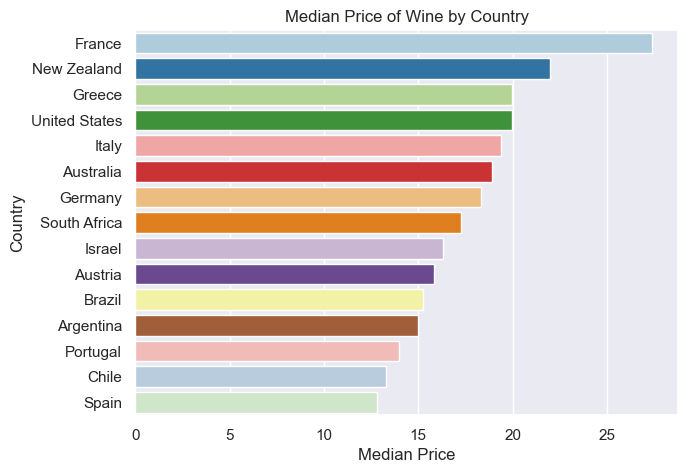

In [14]:
# Chatgpt helped me pick out some pretty colours. 
country_colour_mapping  = {
    'France': '#a6cee3',  
    'New Zealand': '#1f78b4', 
    'Greece': '#b2df8a',  
    'United States': '#33a02c', 
    'Italy': '#fb9a99', 
    'Australia': '#e31a1c', 
    'Germany': '#fdbf6f', 
    'South Africa': '#ff7f00', 
    'Israel': '#cab2d6', 
    'Austria': '#6a3d9a',
    'Brazil': '#ffff99', 
    'Argentina': '#b15928',
    'Portugal': '#fbb4ae', 
    'Chile': '#b3cde3', 
    'Spain': '#ccebc5',
    'Other': '#ff7f00'
}

n_countries = 15
countrylist = list(df['country'].value_counts().head(n_countries).index)
top_countries = df[df['country'].isin(countrylist)]
avg_price_by_country = top_countries.groupby('country')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=avg_price_by_country.values, y=avg_price_by_country.index, palette = country_colour_mapping)
plt.xlabel('Median Price')
plt.ylabel('Country')
plt.title('Median Price of Wine by Country');

## Rating

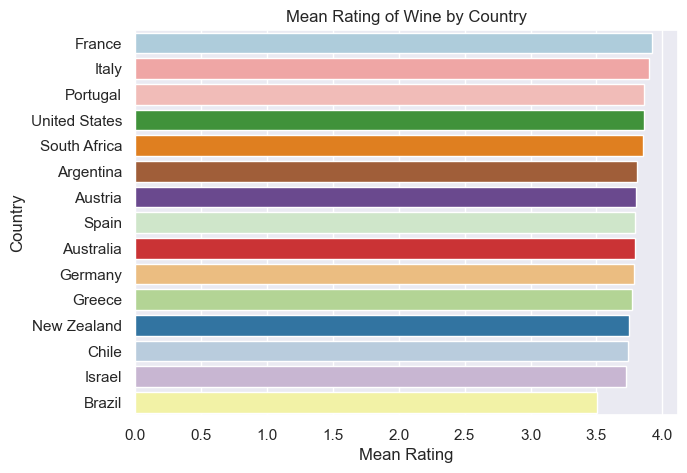

In [15]:
# Average rating by country (using only wines with more than 25 ratings) 
avg_rating_by_country = top_countries.groupby('country')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=avg_rating_by_country.values, y=avg_rating_by_country.index, palette = country_colour_mapping)
plt.xlabel('Mean Rating')
plt.ylabel('Country')
plt.title('Mean Rating of Wine by Country');

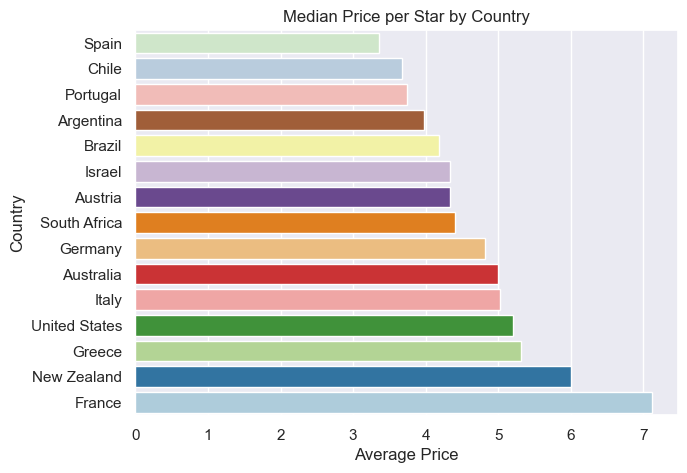

In [16]:
avg_price_per_star_by_country = top_countries.groupby('country')['price_per_star'].median().sort_values(ascending=True)

plt.figure(figsize=(7, 5))
sns.barplot(x=avg_price_per_star_by_country.values, y=avg_price_per_star_by_country.index, palette = country_colour_mapping)
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.title('Median Price per Star by Country');

# Categoricals

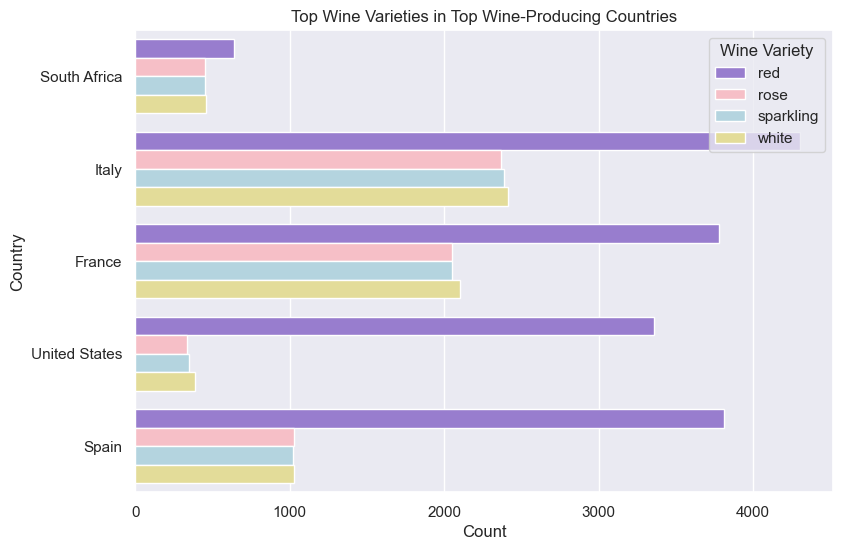

In [17]:
n_countries = 5

top_countries = df['country'].value_counts().nlargest(n_countries).index
df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(9, 6))

sns.countplot(y='country', hue='wine_variety', data=df_top_countries,
              palette=colour_mapping)

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top Wine Varieties in Top Wine-Producing Countries')

plt.legend(title='Wine Variety');

* Of the top 5 most appearing countries in our dataset all countries produce red in highest quantity.
* The other three wine types are fairly even.

# Digging Deeper - Spain and France

Decided to focus on spain as a potential target for good value wines and France for comparison. Furthermore both countries are represented highly in the dataset.

### Vintage Analysis 

In [18]:
# Focus only on vintages with more than 150 ratings
filtered_vintages = consumer_wines.groupby('vintage').filter(lambda x: len(x) >= 150)

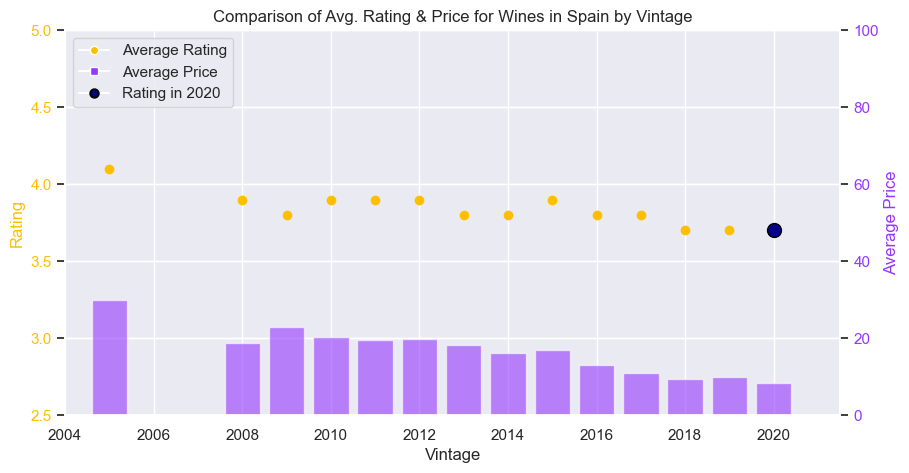

In [19]:
vis.plot_country_vintage_comparison(filtered_vintages, 2020, 'Spain', pricexmax=100, rateymin=2.5)

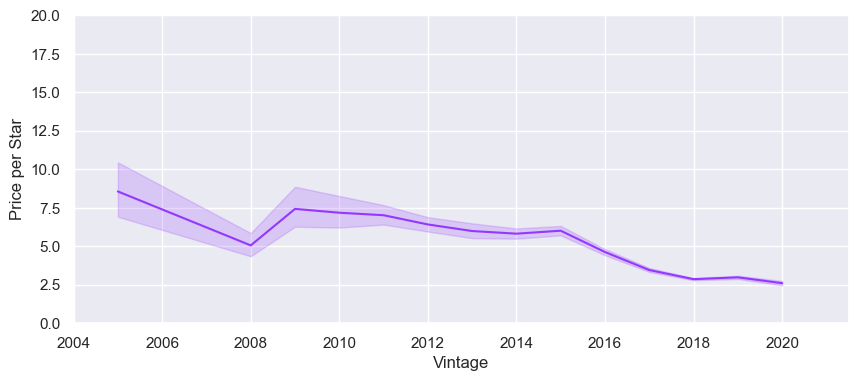

In [20]:
spain_wines = filtered_vintages[filtered_vintages['country'] == 'Spain']

plt.figure(figsize=(10, 4))
sns.lineplot(data=spain_wines, x='vintage', y='price_per_star', color ='#9437FF')
plt.xlabel('Vintage')
plt.ylabel('Price per Star')
plt.xlim(2004,2021.5)
plt.ylim(0,20);

In [21]:
vis.compare_close_vintages_in_a_country(df, 'Spain', 2008)

,Vintage,Avg Rating,Avg Price
10,2005,4.1,31.67
11,2006,4.3,43.35
12,2007,4.0,26.22
13,2008,4.0,20.20
14,2009,3.8,23.77
15,2010,4.0,24.95
16,2011,3.9,19.78


- 2008, 2018, 2019 and 2020 all potentially good value vintages in spain. 
- 2008 for example has a higher rating than surrounding vintages and lower than average price. 

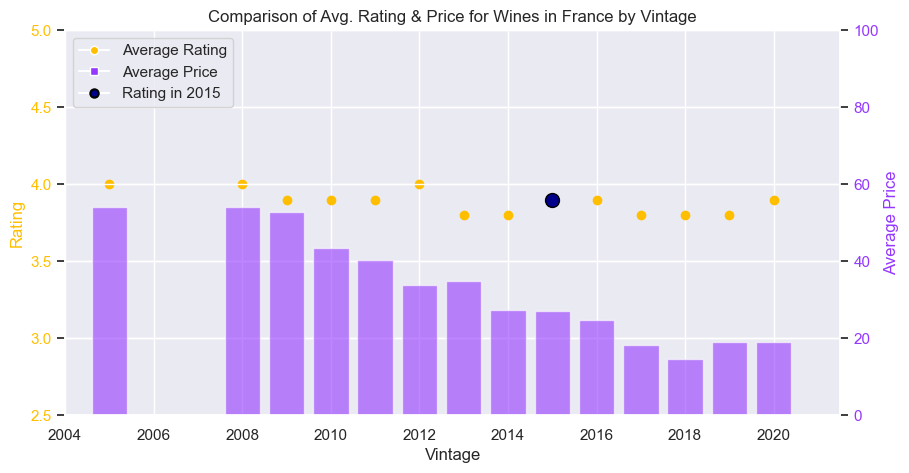

In [22]:
vis.plot_country_vintage_comparison(filtered_vintages, 2015, 'France', pricexmax=100, rateymin=2.5)

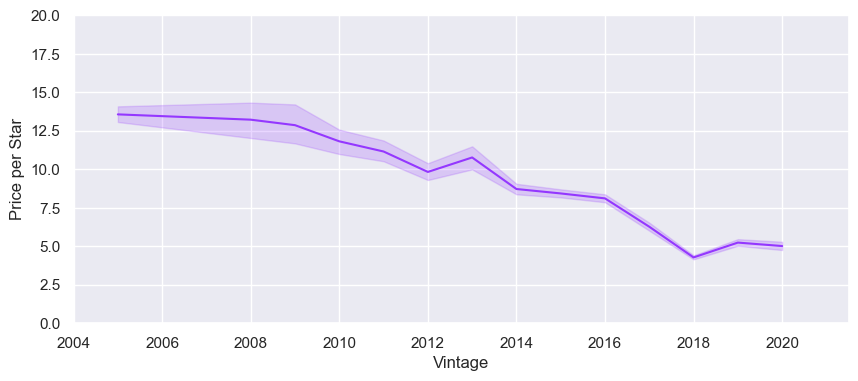

In [23]:
france_wines = filtered_vintages[filtered_vintages['country'] == 'France']

plt.figure(figsize=(10, 4))
sns.lineplot(data=france_wines, x='vintage', y='price_per_star', color ='#9437FF')
plt.xlabel('Vintage')
plt.ylabel('Price per Star')
plt.xlim(2004,2021.5)
plt.ylim(0,20);

In [24]:
vis.compare_close_vintages_in_a_country(df, 'France', 2012)

,Vintage,Avg Rating,Avg Price
20,2009,4.2,80.29
21,2010,4.1,69.07
22,2011,4.0,49.91
23,2012,4.0,39.18
24,2013,3.9,50.45
25,2014,3.9,29.97
26,2015,3.9,28.97


- 2018, 2012 and 2014 portentially good value vintages in France. 
- 2012 for example has a higher rating than the three years after and equal to the year before but it is on average $10 cheaper than 2011 and 2013!

## Regions 

Looking at a region in france that is highly represented in the dataset and one region in Spain through the same lense. 

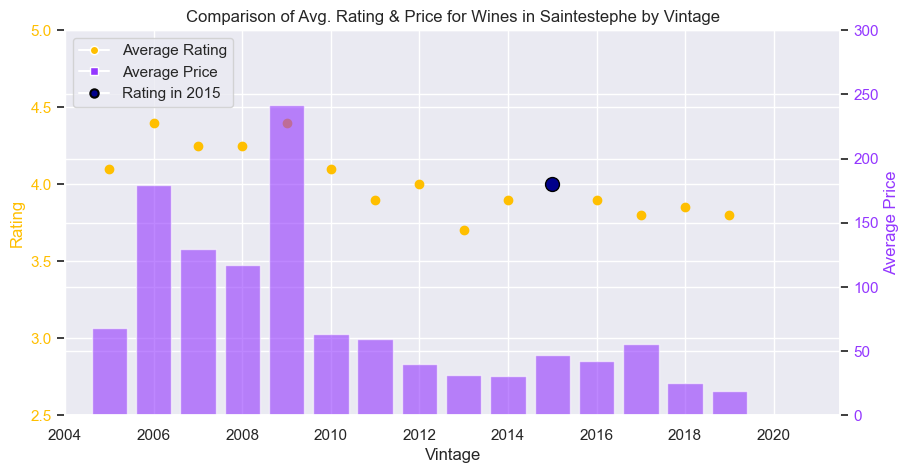

In [25]:
vis.plot_country_vintage_comparison(df, 2015, 'Saintestephe', plot_region=True, pricexmax=300)

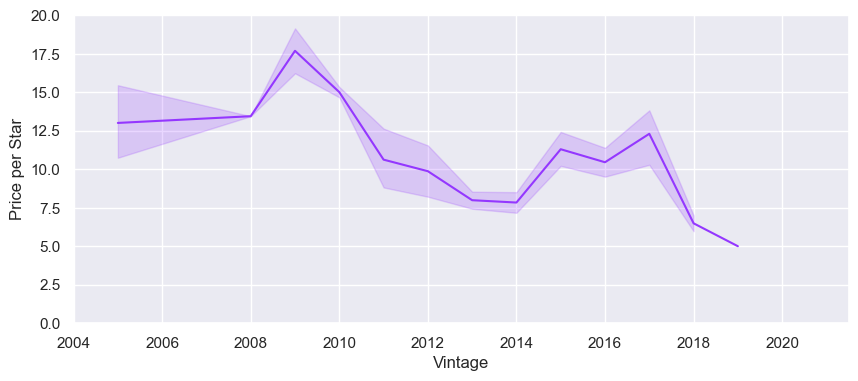

In [26]:
saintestephe_wines = filtered_vintages[filtered_vintages['region'] == 'Saintestephe']

plt.figure(figsize=(10, 4))
sns.lineplot(data=saintestephe_wines, x='vintage', y='price_per_star', color ='#9437FF')
plt.xlabel('Vintage')
plt.ylabel('Price per Star')
plt.xlim(2004,2021.5)
plt.ylim(0,20);

* Potential bargains to be had in Saintestephe 2014 and 2018.

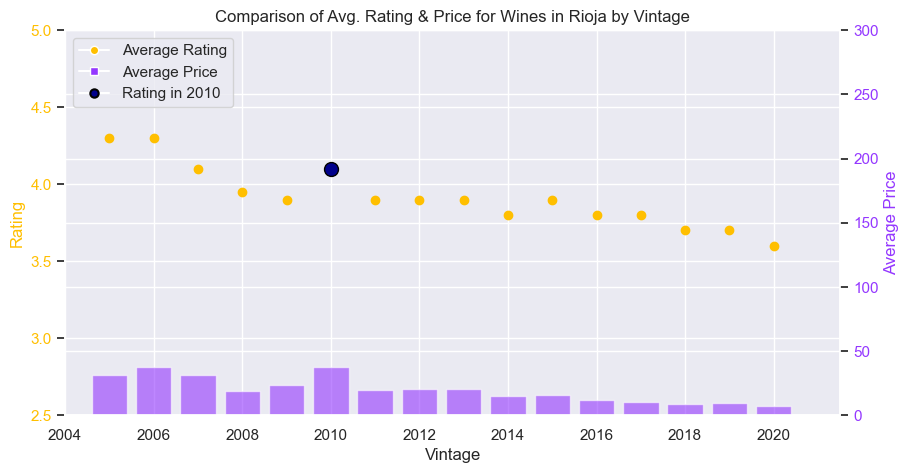

In [27]:
vis.plot_country_vintage_comparison(df, 2010, 'Rioja', plot_region=True, pricexmax=300)

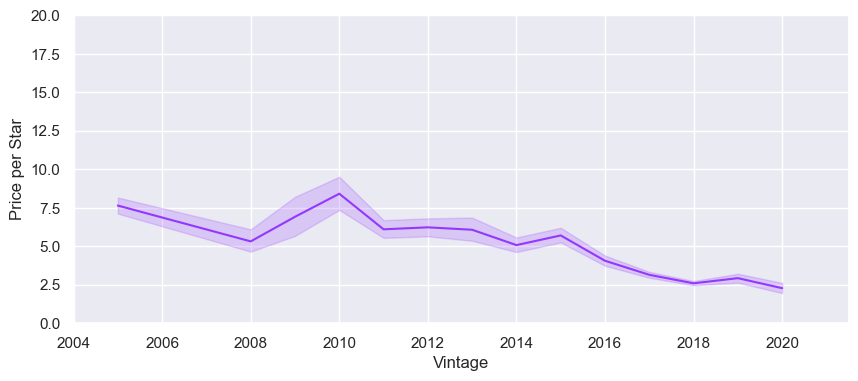

In [28]:
rioja_wines = filtered_vintages[filtered_vintages['region'] == 'Rioja']

plt.figure(figsize=(10, 4))
sns.lineplot(data=rioja_wines, x='vintage', y='price_per_star', color ='#9437FF')
plt.xlabel('Vintage')
plt.ylabel('Price per Star')
plt.xlim(2004,2021.5)
plt.ylim(0,20);

## Finding Underpriced Wines 

In [29]:
# Make a column which represents the average price per star for each region in a given year (vintage)
avg_price_per_star = df.groupby(['region', 'vintage']).apply(lambda x: (x['price'].mean() / x['rating'].mean())).reset_index(name='rvint_price_per_star')
df_rated= pd.merge(df, avg_price_per_star, on=['region', 'vintage'], how='left')
df_rated.drop(columns=['from_vivino', 'reviewed_by'], inplace=True)

# Make a column for region-vintage combinations
df_rated['region_vintage'] = df_rated['region'] + '-' + df_rated['vintage'].astype(str)

# Remove wines with unknown regions
df_rated = df_rated[df_rated['region'] != 'Unknown'].copy()
df_rated = df_rated[df_rated['region'] != 'Other'].copy()

# Make a column for the difference between the average price per star and the average price per star for each region-vintage
df_rated['price_per_star_diff'] = df_rated['price_per_star'] - df_rated['rvint_price_per_star']

#### Spain

In [30]:
# Make a shortlist of region vintages to focus on with at least 30 observations
spain_wines_rated = df_rated[df_rated['country'] == 'Spain'].copy()
spain_rvint_list = [index for index,value in spain_wines_rated['region_vintage'].value_counts().items() if value > 29]
spain_df_rated_shortlist = spain_wines_rated[spain_wines_rated['region_vintage'].isin(spain_rvint_list)].copy()
# Isolate producers wine representations in 5 or more vintages
spain_producers_with_4_or_more_vintages = spain_df_rated_shortlist.groupby('producer')['vintage'].nunique().loc[lambda x: x >= 5].index
spain_final_df = spain_df_rated_shortlist[spain_df_rated_shortlist['producer'].isin(spain_producers_with_4_or_more_vintages)]

Avg rating 
 producer
Bodega De Bardos    4.011765
Bodegas Valdemar    4.000000
Condado De Oriza    3.685000
Cune Cvne           3.566667
Vega Real           3.740000
Name: rating, dtype: float64
Avg price 
 producer
Bodega De Bardos    14.118824
Bodegas Valdemar    21.470000
Condado De Oriza    11.070500
Cune Cvne            7.176667
Vega Real           14.567333
Name: price, dtype: float64


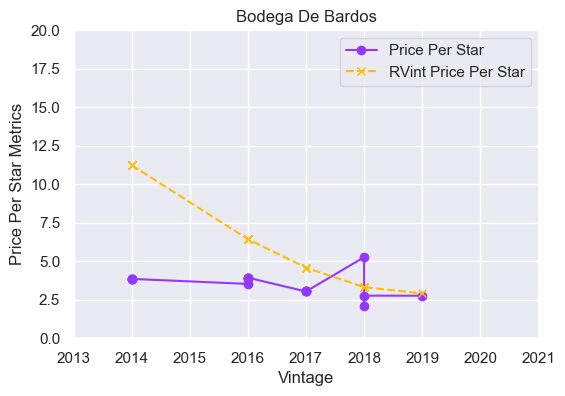

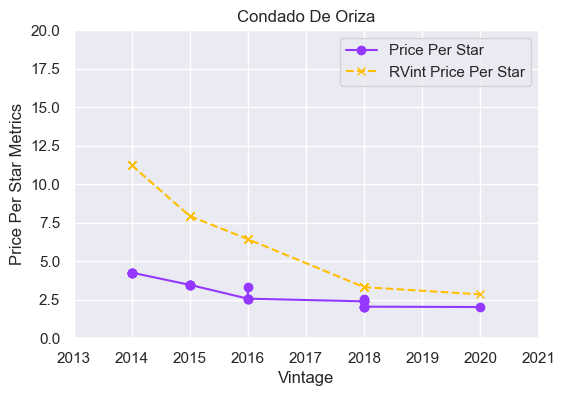

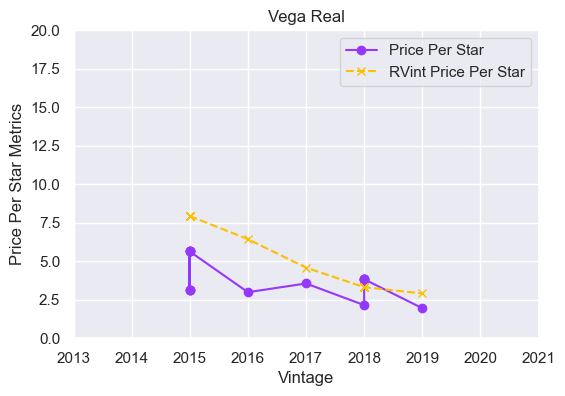

In [31]:
# Find best value producers in Ribera Del Duero
ribera = spain_final_df[spain_final_df['region'] == 'Ribera Del Duero']
ribera_shortlist = ribera.groupby('producer')['price_per_star_diff'].mean().sort_values(ascending=True).head(5).index
ribera_shortlist = ribera[ribera['producer'].isin(ribera_shortlist)]
vis.plot_producer_price_per_star(ribera_shortlist, xlimmin= 2013, xlimmax=2021,  ylim = 20)

#### Rioja

Avg rating 
 producer
Castillo Clavijo    3.742857
Cune Cvne           3.660000
Montecillo          3.721739
Rioja Vega          3.688235
Vina Albina         3.685714
Name: rating, dtype: float64
Avg price 
 producer
Castillo Clavijo    11.357143
Cune Cvne           10.041000
Montecillo          14.488696
Rioja Vega          13.419706
Vina Albina         13.531905
Name: price, dtype: float64


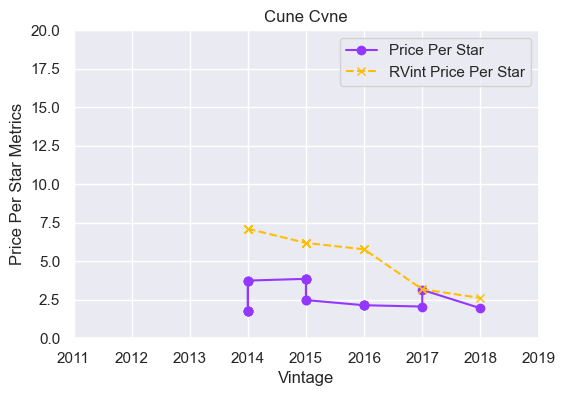

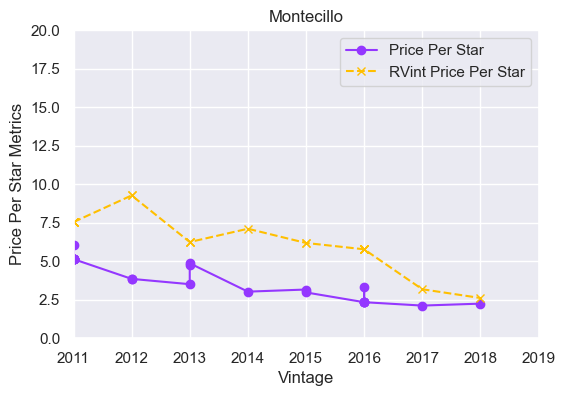

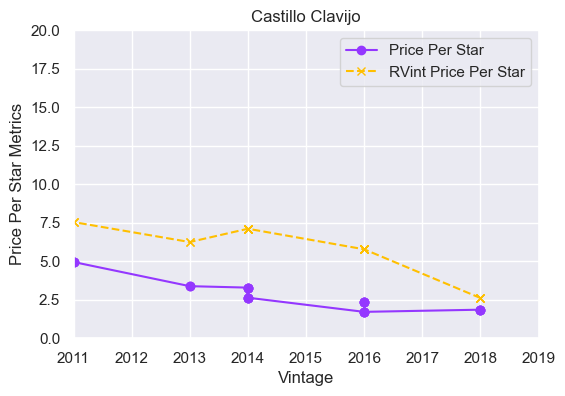

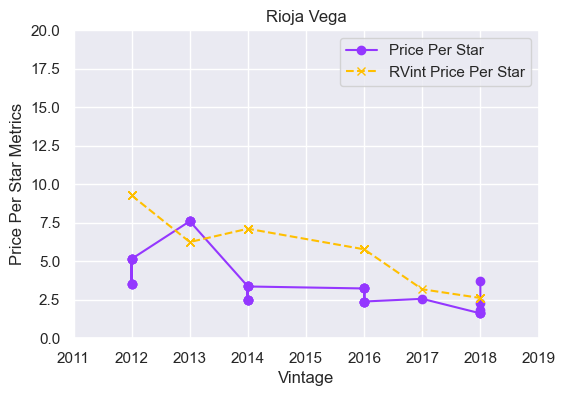

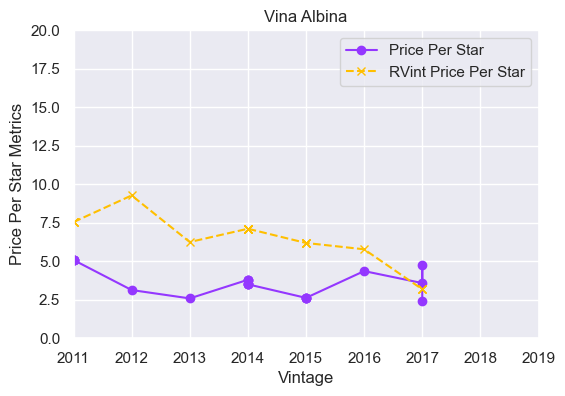

In [32]:
# Find best value producers in Ribera Del Duero
rioja = spain_final_df[spain_final_df['region'] == 'Rioja']
rioja_shortlist = rioja.groupby('producer')['price_per_star_diff'].mean().sort_values(ascending=True).head(5).index
rioja_shortlist = rioja[rioja['producer'].isin(rioja_shortlist)]
vis.plot_producer_price_per_star(rioja_shortlist, xlimmin= 2011, xlimmax=2019,  ylim = 20)

#### France

In [33]:
# Make a shortlist of region vintages to focus on with at least 30 observations
france_wines_rated = df_rated[df_rated['country'] == 'France'].copy()
france_rvint_list = [index for index,value in france_wines_rated['region_vintage'].value_counts().items() if value > 29]
france_df_rated_shortlist = france_wines_rated[france_wines_rated['region_vintage'].isin(france_rvint_list)].copy()
# Isolate producers wine representations in 5 or more vintages
france_producers_with_4_or_more_vintages = france_df_rated_shortlist.groupby('producer')['vintage'].nunique().loc[lambda x: x >= 5].index
france_final_df = france_df_rated_shortlist[france_df_rated_shortlist['producer'].isin(france_producers_with_4_or_more_vintages)]

Avg rating 
 producer
Chateau Beausejour Becot     4.166667
Chateau Belairmonange        4.095122
Chateau Canonlagaffeliere    4.187500
Chateau Destieux             4.217647
Chateau Figeac               4.396000
Name: rating, dtype: float64
Avg price 
 producer
Chateau Beausejour Becot      82.231905
Chateau Belairmonange        112.177561
Chateau Canonlagaffeliere    109.525625
Chateau Destieux              67.230588
Chateau Figeac               218.554800
Name: price, dtype: float64


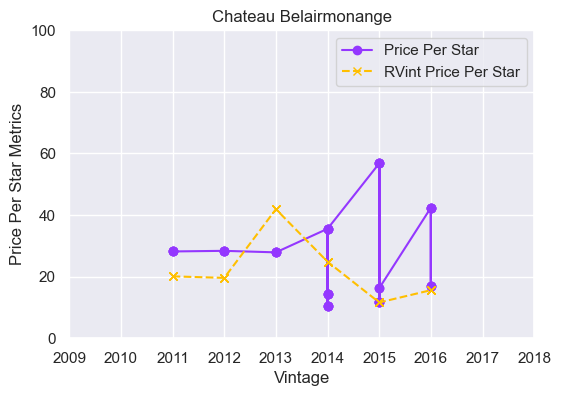

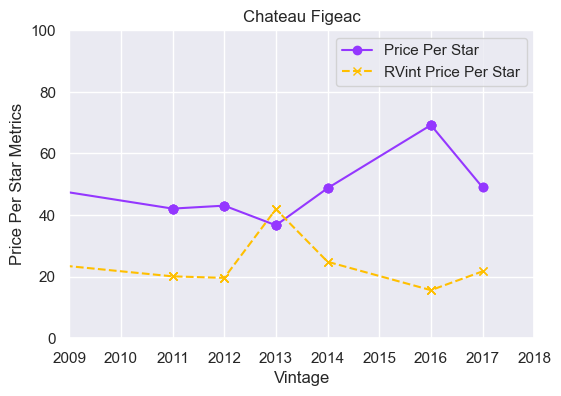

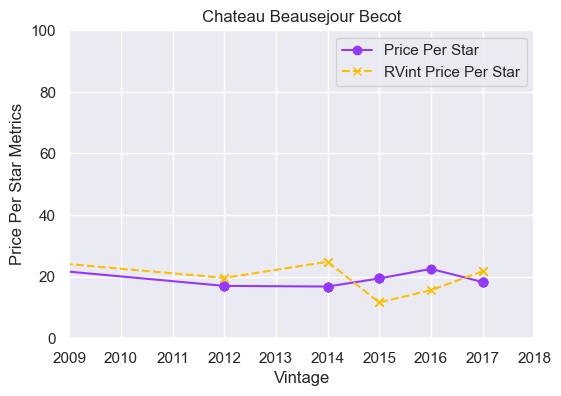

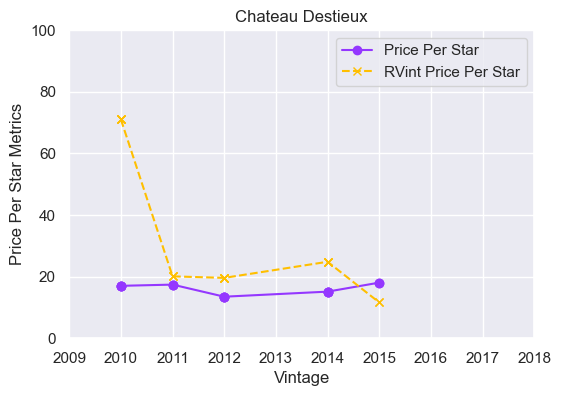

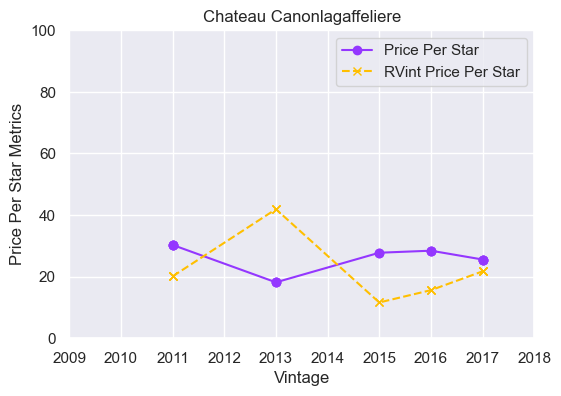

In [34]:
# Find best value producers in Saintemilion Grand Cru
saintemilion= france_final_df[france_final_df['region'] == 'Saintemilion Grand Cru']
saintemilion_shortlist = saintemilion.groupby('producer')['price_per_star_diff'].mean().sort_values(ascending=True).head(5).index
saintemilion_shortlist = saintemilion[saintemilion['producer'].isin(saintemilion_shortlist)]
vis.plot_producer_price_per_star(saintemilion_shortlist, xlimmin= 2009, xlimmax=2018,  ylim = 100)

Avg rating 
 producer
Chateau Branecantenac          4.043750
Chateau Labegorce              3.940000
Chateau Malescot St Exupery    4.300000
Chateau Rauzansegla            4.184211
Name: rating, dtype: float64
Avg price 
 producer
Chateau Branecantenac           69.547500
Chateau Labegorce               42.610000
Chateau Malescot St Exupery    111.638000
Chateau Rauzansegla            122.089474
Name: price, dtype: float64


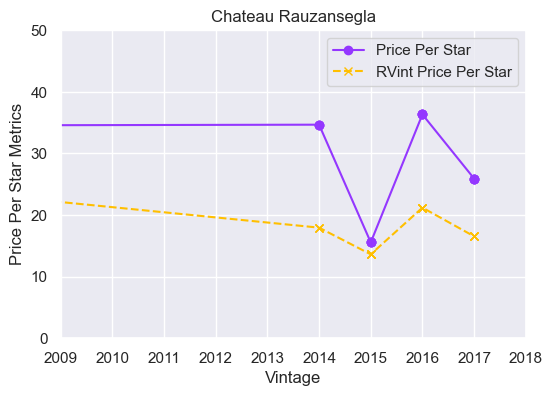

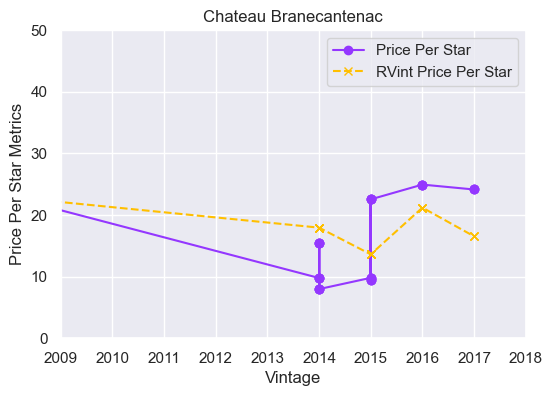

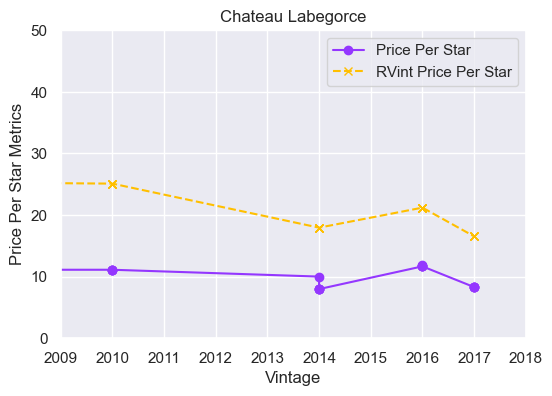

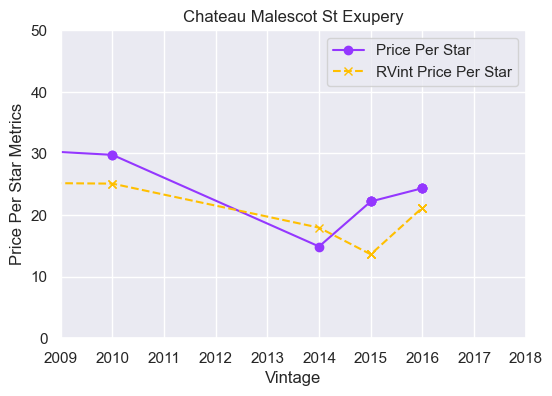

In [35]:
# Find best value producers in Margaux
margaux= france_final_df[france_final_df['region'] == 'Margaux']
margaux_shortlist = margaux.groupby('producer')['price_per_star_diff'].mean().sort_values(ascending=True).head(5).index
margaux_shortlist = margaux[margaux['producer'].isin(margaux_shortlist)]
vis.plot_producer_price_per_star(margaux_shortlist, xlimmin= 2009, xlimmax=2018,  ylim = 50)

## Individual Wines

In [36]:
high_rating_threshold = df['rating'].quantile(0.85)
low_price_threshold = df['price'].quantile(0.15)

great_value_wines = df[(df['rating'] >= high_rating_threshold) & (df['price'] <= low_price_threshold)].copy()

# A df of wines in top 15% of ratings and bottom 15% of prices.
great_value_wines['country'].value_counts()

country
France           8
Spain            5
United States    4
Italy            4
Chile            1
Name: count, dtype: int64

### ABV - Alcohol Content Exploration

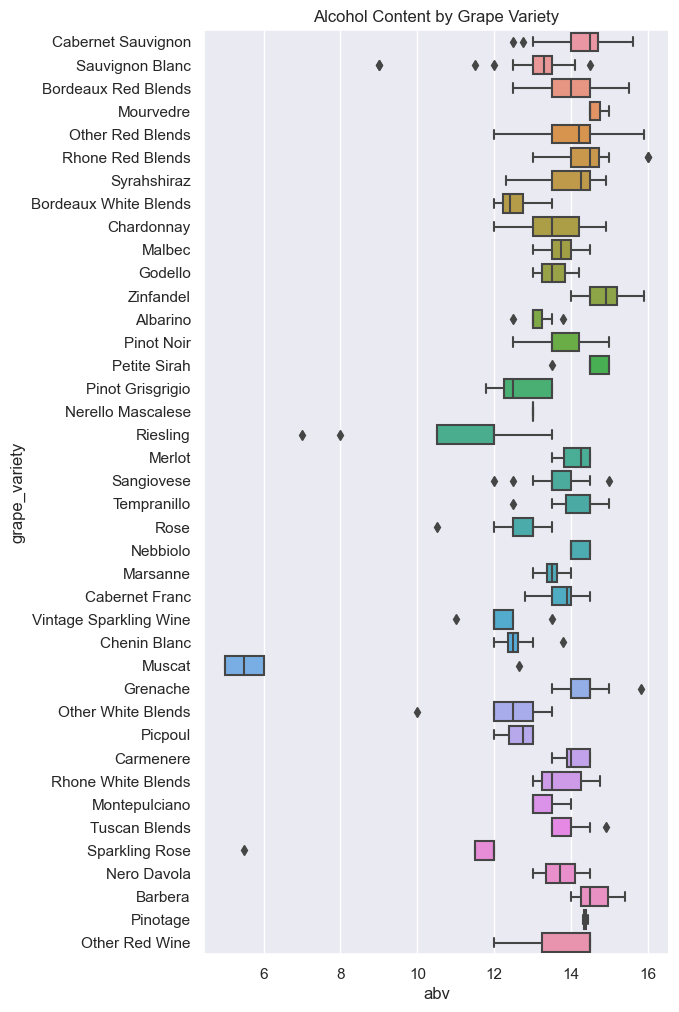

In [37]:
df_a = df[df['abv'].isna() == False]
popular_grape_varieties = df_a[(df_a['grape_variety'].isin((df_a['grape_variety'].value_counts().head(40).index)))]
plt.figure(figsize=(6, 12)) 
sns.boxplot(x='abv', y='grape_variety', data=popular_grape_varieties)
plt.xticks() 
plt.title('Alcohol Content by Grape Variety')
plt.show()


* Fair amount of variation between average abv and abv spread between differing grape varieties. Muscat and Riesling for example are trypically on the lower end of alcohol content.

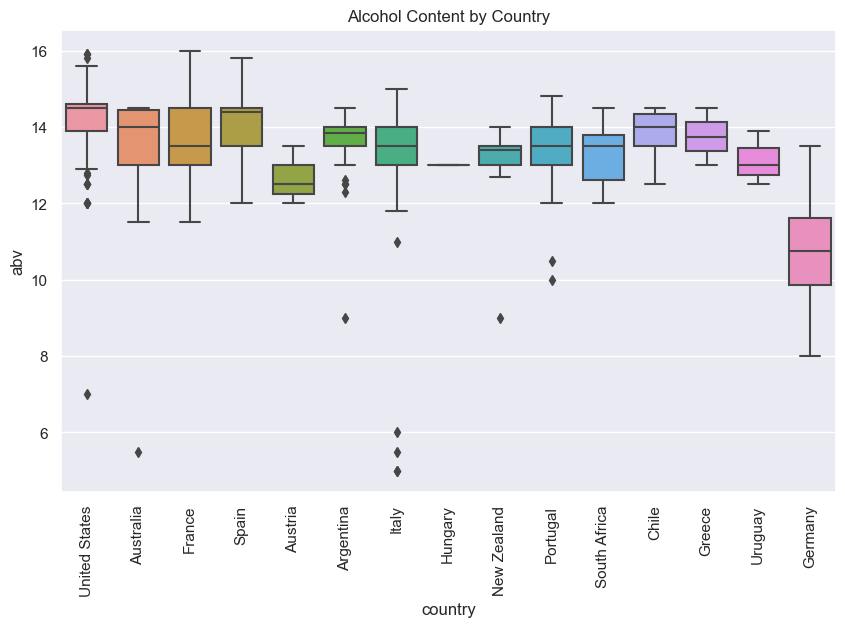

In [38]:
# Box plot for abv 
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='country', y='abv', data=df_a)
plt.xticks(rotation=90) 
plt.title('Alcohol Content by Country')
plt.show()

* Germany, a country known for its Reisling wine is one of the countries with the lowest average alcohol content. 
* Most countries fall between the 15% - 12.5% range 
* Unfortified wines contain anywhere from 5.5% to 16% ABV, with an average in our dataset of 13.6%. 

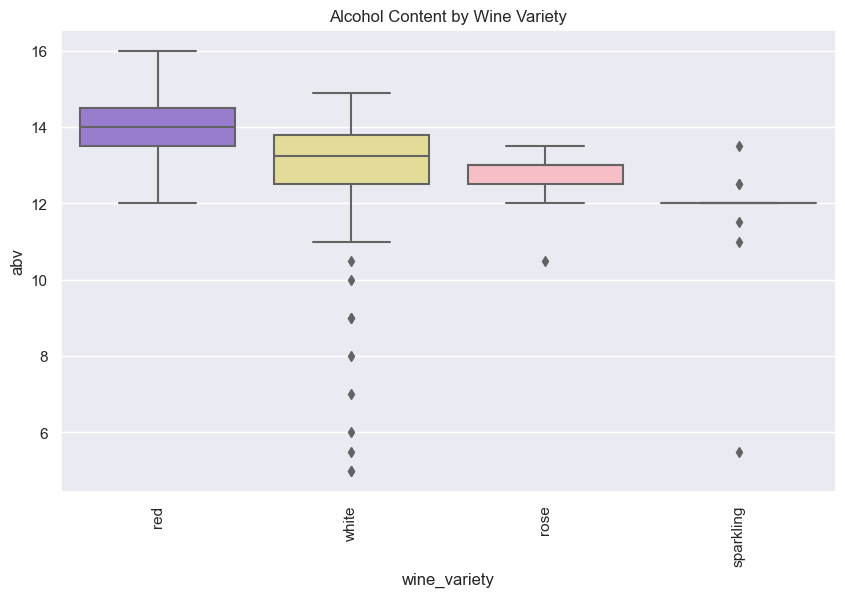

In [39]:
colour_mapping = {
    'red': 'mediumpurple',
    'rose': 'lightpink',
    'white': 'khaki',
    'sparkling': 'lightblue'
}
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='wine_variety', y='abv', data=df_a, palette=colour_mapping)
plt.xticks(rotation=90) 
plt.title('Alcohol Content by Wine Variety')
plt.show()

* Red wines typically have a higher alcohol content than other wine types. 
* Sparkling wines have the lowest. 
* White and rose are in the middle though white has a larger spread than rose overlappying with red and rose wines in abv levels. 